# CA4
## Amirhossein Alizad 810197546

<strong> The purpose of this project is introduction to machine learning using the scikit-learn library. First we read the train data from the 'train.csv' file and then we pre-process and prepare the data to categorize and predict prices. we are going to use 3 kinds of Regression:<br>
1- K Neighbors Regression<br>
2- Decision Tree Regression<br>
3- Linear Regression<br>
4- Random Forest Regression<br>
5- Voting Regression</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics as metrics
from sklearn.preprocessing import LabelEncoder as le
from sklearn.ensemble import VotingRegressor as vr
from sklearn.model_selection import GridSearchCV
import warnings
from category_encoders import *
warnings.filterwarnings('ignore')


# Phase 0


In [2]:
def Na_percentage(row, count):
    return row.isna().sum() * 100 / count 
def get_log(row):
    print(row)

# 0.0

In [3]:
df = pd.read_csv('train.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

<strong> the describe function shows the datas below for every column:<br>
1- mean<br>
2- std (standard deviation)<br>
3- minimum value<br>
4- lower percentile (by default 25%)<br>
5- middle percentile (by default 50% - median)<br>
6- upper percentile (by default 75%)<br>
7- maximum value</strong>

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<strong> the info function shows the count of non-null values and type of every column<br>
as we can see there are some columns with null values and some columns with object type(string) which we should handle.</strong>

# 0.1


In [5]:
count = df.count()[0]
df2 = df.apply(lambda x : Na_percentage(x, count))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df2[df2>0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


<strong>for every column the percentage of null values is equal to the count of null values divided by the count of all values</strong>

# 0.2

<AxesSubplot:>

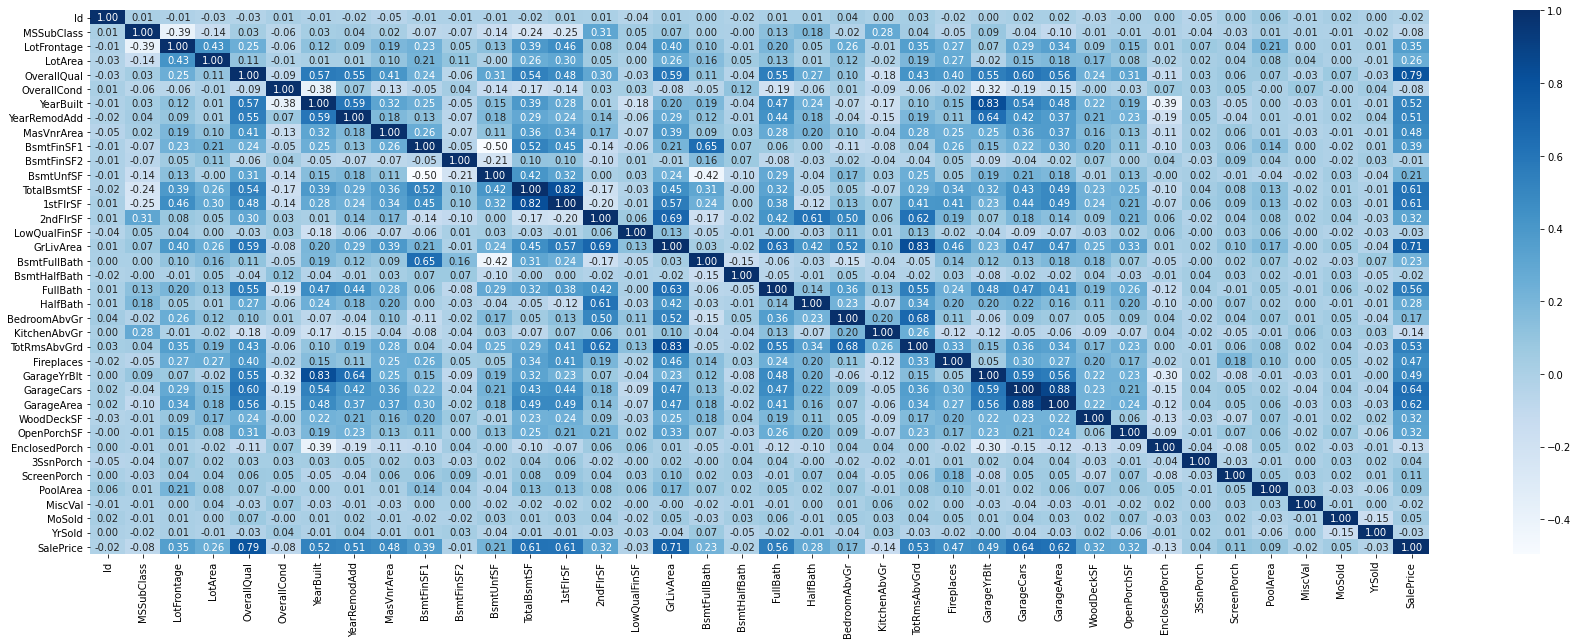

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(corr,annot = True,fmt = '.2f',cmap = 'Blues',ax=ax)

<strong> a complete look at the heat map of correalation of the columns with normal prices</strong>

In [7]:
corr.style.background_gradient(cmap ='Blues') 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

<strong>a closer look, as we can see the correalation between SalePrice value and the 4 values shown below are the highest in the shown heatmap:<br>
1- OverallQual<br>
2- GrLiveArea<br>
3- GarageCars<br>
4- GarageArea</strong>

# 0.4

<AxesSubplot:>

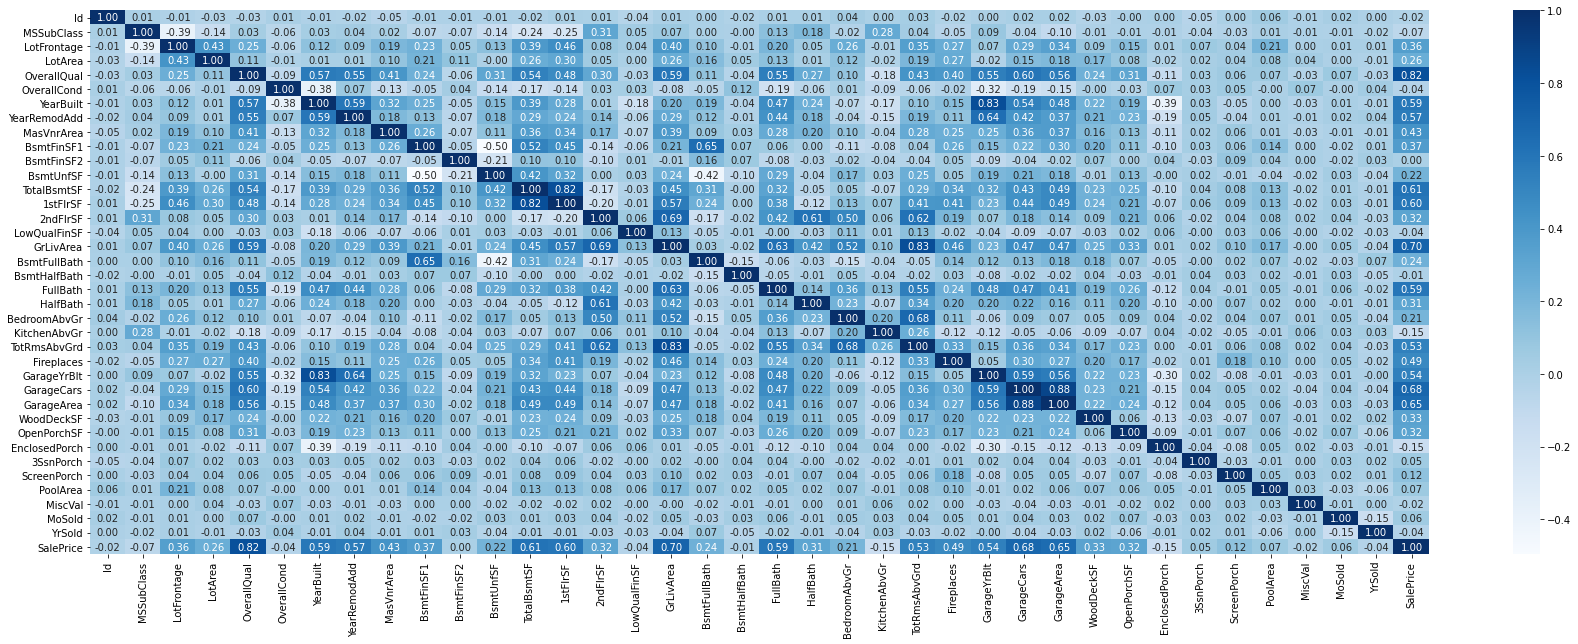

In [8]:
df['SalePrice'] = np.log10(df['SalePrice'])
fig, ax = plt.subplots(figsize=(30,10))
corr = df.corr()
sns.heatmap(corr,annot = True,fmt = '.2f',cmap = 'Blues',ax=ax)

<strong> a complete look at the heat map of correalation of the columns with logarithm of the prices</strong>

In [9]:
corr.style.background_gradient(cmap ='Blues') 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355878
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

<strong>a closer look, we see that there is not much difference but there is a slight change in the correalation values, because when we calculate the logarithm of the prices, th difference between values become less and because of that, some of the correalation values might increase</strong>


# 0.5

<strong> the values we chose above, are not enough to predict the prices of our test data because <br>
1- we only chose the 4 best datas but as we can see there are still some other correalations greater than 0 which will affect our prediction</strong>
<strong><br>2- for example GarageCars and GarageArea both have high correlation with SalePrice. But number of cars that fit in a garage is completely related to its area, meaning these two features give the same info and both of them together is no better than one of them. If we look at the heatmap we can see they have a bright square for each other.</strong>

# 0.6

<AxesSubplot:title={'center':'Hexbin SalePrice and OverallQual Dependency'}, xlabel='OverallQual', ylabel='SalePrice'>

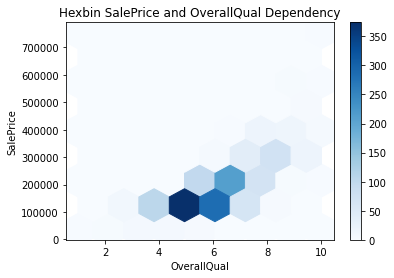

In [10]:
df = pd.read_csv('train.csv')
df.plot.hexbin(x='OverallQual', y='SalePrice', gridsize=8, cmap="Blues", sharex = False, title = "Hexbin SalePrice and OverallQual Dependency")

<strong> as we cam see in the hexbin the correalation between SalePrice and OverallQual is the most when :<br> 1- $200000 \geq SalePrice \geq 100000$<br>
2- $OverallQual = 5$</strong>

<AxesSubplot:title={'center':'Hexbin SalePrice and GrLiveArea Dependency'}, xlabel='GrLivArea', ylabel='SalePrice'>

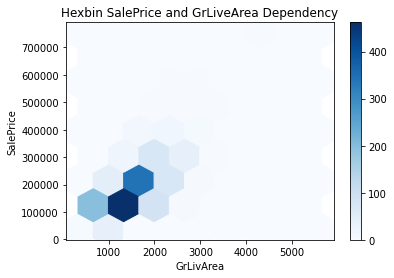

In [11]:
df.plot.hexbin(x='GrLivArea', y='SalePrice', gridsize=8, cmap="Blues", sharex = False, title = "Hexbin SalePrice and GrLiveArea Dependency")

<strong>the correalation between SalePrice and OverallQual is the most when :<br>
1- $200000 \geq SalePrice \geq 100000$<br>
2- $2000\geq GrLiveArea \geq 1000$ </strong>

<AxesSubplot:title={'center':'Hexbin SalePrice and GarageCars Dependency'}, xlabel='GarageCars', ylabel='SalePrice'>

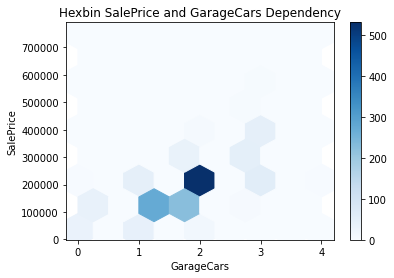

In [12]:
df.plot.hexbin(x='GarageCars', y='SalePrice', gridsize=8, cmap="Blues", sharex = False, title = "Hexbin SalePrice and GarageCars Dependency")

<strong>the correalation between SalePrice and OverallQual is the most when :<br> 1- $300000 \geq SalePrice \geq 200000$<br>
2- $GarageCars = 2$</strong>

<AxesSubplot:title={'center':'Hexbin SalePrice and GarageArea Dependency'}, xlabel='GarageArea', ylabel='SalePrice'>

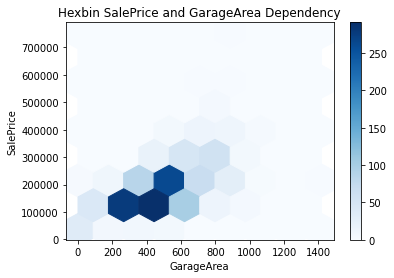

In [13]:
df.plot.hexbin(x='GarageArea', y='SalePrice', gridsize=8, cmap="Blues", sharex = False, title = "Hexbin SalePrice and GarageArea Dependency")

<strong>the correalation between SalePrice and GarageArea is the most when :<br> 1- $200000 \geq SalePrice \geq 100000$<br>
2- $500\geq GarageArea\geq 400$</strong>

<AxesSubplot:title={'center':'Scatter SalePrice and OverallQual Dependency'}, xlabel='OverallQual', ylabel='SalePrice'>

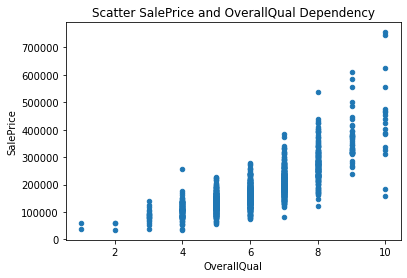

In [14]:
df.plot.scatter(x='OverallQual', y='SalePrice', cmap="Blues", sharex = False, title = "Scatter SalePrice and OverallQual Dependency")

<strong> scatter plot for correalation between SalePrice and OverallQual</strong>

<AxesSubplot:title={'center':'Scatter SalePrice and GrLiveArea Dependency'}, xlabel='GrLivArea', ylabel='SalePrice'>

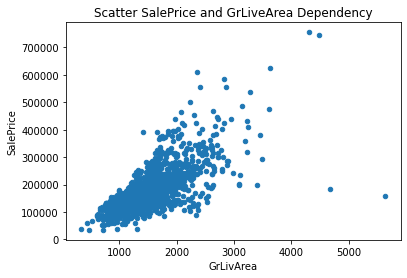

In [15]:
df.plot.scatter(x='GrLivArea', y='SalePrice', cmap="Blues", sharex = False, title = "Scatter SalePrice and GrLiveArea Dependency")

<strong> scatter plot for correalation between SalePrice and GrLiveArea</strong>

<AxesSubplot:title={'center':'Scatter SalePrice and GarageCars Dependency'}, xlabel='GarageCars', ylabel='SalePrice'>

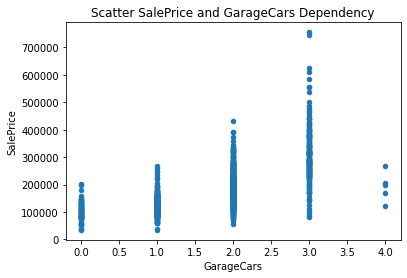

In [16]:
df.plot.scatter(x='GarageCars', y='SalePrice', cmap="Blues", sharex = False, title = "Scatter SalePrice and GarageCars Dependency")

<strong> scatter plot for correalation between SalePrice and GarageCars</strong>

<AxesSubplot:title={'center':'Scatter SalePrice and GarageArea Dependency'}, xlabel='GarageArea', ylabel='SalePrice'>

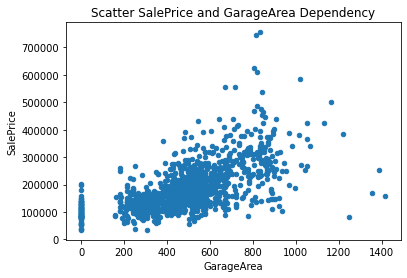

In [17]:
df.plot.scatter(x='GarageArea', y='SalePrice', cmap="Blues", sharex = False, title = "Scatter SalePrice and GarageArea Dependency")

<strong> scatter plot for correalation between SalePrice and GarageArea</strong>

<strong> as we can see the scatter plot shows the exact values of $(SalePrice_i, GarageArea_i)$ but does not show the dependency and correalation. on the other hand the hexbin plot is the opposite and only shows the dependency and correalation of a range of X values and Y values</strong>

# 0.7

<strong> in my opinion these fateures may have the most effects on predictions:<br>
1- OverallCond<br>
2- YearBuilt<br>
3- YearRemodAdd</strong>

<AxesSubplot:title={'center':'Scatter SalePrice and OverallCond Dependency'}, xlabel='OverallCond', ylabel='SalePrice'>

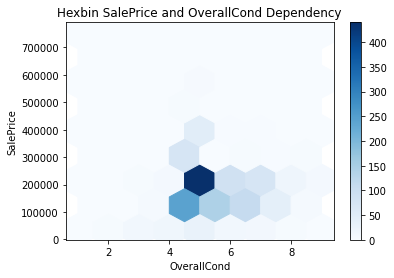

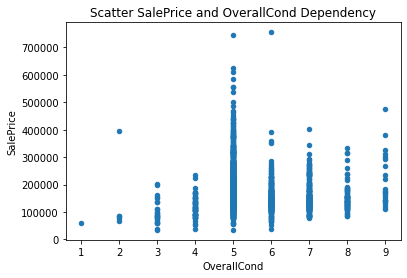

In [18]:
df.plot.hexbin(x='OverallCond', y='SalePrice', gridsize=8, cmap="Blues", sharex = False, title = "Hexbin SalePrice and OverallCond Dependency")
df.plot.scatter(x='OverallCond', y='SalePrice', cmap="Blues", sharex = False, title = "Scatter SalePrice and OverallCond Dependency")

<AxesSubplot:title={'center':'Scatter SalePrice and YearBuilt Dependency'}, xlabel='YearBuilt', ylabel='SalePrice'>

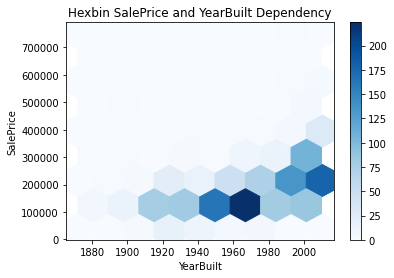

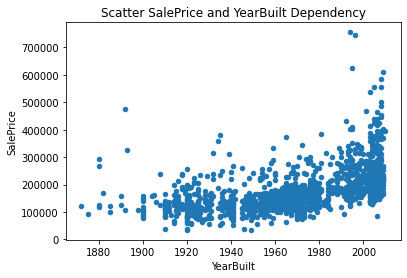

In [19]:
df.plot.hexbin(x='YearBuilt', y='SalePrice', gridsize=8, cmap="Blues", sharex = False, title = "Hexbin SalePrice and YearBuilt Dependency")
df.plot.scatter(x='YearBuilt', y='SalePrice', cmap="Blues", sharex = False, title = "Scatter SalePrice and YearBuilt Dependency")

<AxesSubplot:title={'center':'Scatter SalePrice and GarageQual Dependency'}, xlabel='YearRemodAdd', ylabel='SalePrice'>

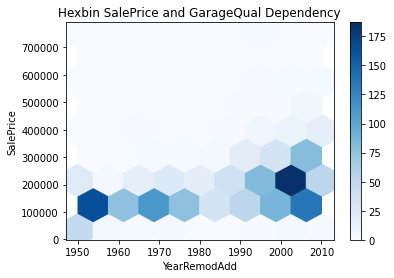

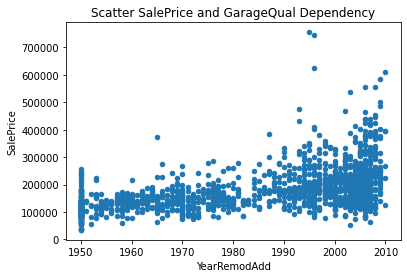

In [20]:
df.plot.hexbin(x='YearRemodAdd', y='SalePrice', gridsize=8, cmap="Blues", sharex = False, title = "Hexbin SalePrice and GarageQual Dependency")
df.plot.scatter(x='YearRemodAdd', y='SalePrice', cmap="Blues", sharex = False, title = "Scatter SalePrice and GarageQual Dependency")

# Phase 1


# 1.1

<strong>Ways of Handling Missing Data:<br>
1- Listwise Deletion: Delete all data from any participant with missing values. If your sample is large enough, then you likely can drop data without substantial loss of statistical power.<br>
2- Recover the Values: You can sometimes contact the participants and ask them to fill out the missing values.<br>
3- Educated Guessing: It sounds arbitrary and isn’t your preferred course of action, but you can often infer a missing value.<br>
4- Average Imputation: Use the average value of the responses from the other participants to fill in the missing value.<br>
5- Regression Substitution: You can use multiple-regression analysis to estimate a missing value. We use this technique to deal with missing SUS scores.</strong>

# 1.2

<strong>according to the percentages in phase 1:<br>
Alley, PoolQC, Fence, MiscFeature have the most missed value percentage</strong>

In [21]:
def fn_feature_engg(df):
    
    cols_to_del = ['Id','Alley','PoolQC','Fence','MiscFeature',
                   'Utilities','CentralAir','Street','BsmtHalfBath','LandSlope','PavedDrive','BsmtCond','KitchenAbvGr','Electrical','GarageQual','GarageCond','Heating','RoofMatl','Condition2','PoolArea']
    df = df.drop(cols_to_del,axis = 1)
    fill_dict = {('MasVnrType',): 'None',('MasVnrArea','GarageYrBlt','LotFrontage') : 0,('BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish') : "NA"}
    for keys,values in fill_dict.items():
        for cols in keys:
            df[cols].fillna(values,inplace = True)
    cols_to_impute_median = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']
    cols_to_impute_mode = ['Exterior1st','Exterior2nd','BsmtFullBath','SaleType','GarageCars','MSZoning','KitchenQual', 'Functional']
    for cols in cols_to_impute_median :
        df[cols] = df[cols].fillna(df[cols].median())
    for cols in cols_to_impute_mode :
        df[cols] = df[cols].fillna(df[cols].mode()[0])

    cat_cols_1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'HeatingQC', 'KitchenQual','FireplaceQu']
    cat_1 = ['Ex','Gd','TA','Fa','Po','NA']
    cat_1_mapping = {'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,'NA':1}

    cat_cols_2 = ['BsmtFinType1', 'BsmtFinType2']
    cat_2 = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA']
    cat_2_mapping = {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1}


    cat_cols_3 = ['BsmtExposure']
    cat_3 = ['Gd','Av','Mn','No','NA']
    cat_3_mapping = {'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1}
    
    cat_cols_4 = ['LotShape']
    cat_4 = ['Reg','IR1','IR2','IR3']
    cat_4_mapping = {'Reg':4,'IR1':3,'IR2':2,'IR3':1}
    
    cat_cols_5 = ['GarageFinish']
    cat_5 = ['Fin','RFn','Unf','NA']
    cat_5_mapping = {'Fin':4,'RFn':3,'Unf':2,'NA':1}



    for cols in cat_cols_1 :
        df[cols] = df[cols].map(cat_1_mapping)
    for cols in cat_cols_2 :
        df[cols] = df[cols].map(cat_2_mapping)
    for cols in cat_cols_3 :
        df[cols] = df[cols].map(cat_3_mapping)
    for cols in cat_cols_4 :
        df[cols] = df[cols].map(cat_4_mapping)        
    for cols in cat_cols_5 :
        df[cols] = df[cols].map(cat_5_mapping)  

    df['YearsOld'] = df['YrSold'] - df['YearBuilt']
    df['IsRemod'] = (df['YearBuilt'] < df['YearRemodAdd']).astype(int)
    df['YearsRemod'] = df['YrSold'] - df['YearRemodAdd']
    df['YearsOldGarage'] = df['YrSold']-df['GarageYrBlt']


    df[df['YearsOld'] < 0]['YearsOld'] = 0
    df[df['YearsRemod'] < 0]['YearsRemod'] = 0
    df[df['YearsOldGarage'] < 0]['YearsOldGarage'] = 0
 
    
    

    cols_to_del = ['YrSold','YearBuilt','MoSold','YearRemodAdd','GarageYrBlt']
    df = df.drop(cols_to_del,axis = 1)
    
    return df

# Handling Missed Values and PreProcessing
# delete the null values percentage > 80%
<strong>
Alley : More than 90 % of the data is null , so remove this column<br>
PoolQC : 99% of the data is null , so remove this column<br>
Fence : 80% of the data is null , so remove this column<br>
MiscFeature : 96 % of the data is null , so remove this column<br>
</strong>

# impute the categorical values with constants
<strong>
we encode these columns</strong>

# Createnew features and delete old features
<strong>
YrSold  - YearBuilt =   YearsOld (New feature Drop YrSold , YearBuilt)<br>
YrSold  - YearRemodAdd = YearsRemod(New feature Drop YrSold , YearRemodAdd)<br>
if YearBuilt  $<$ YearRemodAdd = IsRemod(New feature)<br>
YrSold-GarageYrBlt = YearsOldGarage(New Feature Drop GarageYrBlt )
</strong>

# Delete old columns
<strong>
'YrSold','YearBuilt','MoSold','YearRemodAdd','GarageYrBlt'</strong>

In [22]:
train = fn_feature_engg(df)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,3SsnPorch,ScreenPorch,MiscVal,SaleType,SaleCondition,SalePrice,YearsOld,IsRemod,YearsRemod,YearsOldGarage
0,60,RL,65.0,8450,4,Lvl,Inside,CollgCr,Norm,1Fam,...,0,0,0,WD,Normal,208500,5,0,5,5.0
1,20,RL,80.0,9600,4,Lvl,FR2,Veenker,Feedr,1Fam,...,0,0,0,WD,Normal,181500,31,0,31,31.0
2,60,RL,68.0,11250,3,Lvl,Inside,CollgCr,Norm,1Fam,...,0,0,0,WD,Normal,223500,7,1,6,7.0
3,70,RL,60.0,9550,3,Lvl,Corner,Crawfor,Norm,1Fam,...,0,0,0,WD,Abnorml,140000,91,1,36,8.0
4,60,RL,84.0,14260,3,Lvl,FR2,NoRidge,Norm,1Fam,...,0,0,0,WD,Normal,250000,8,0,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,4,Lvl,Inside,Gilbert,Norm,1Fam,...,0,0,0,WD,Normal,175000,8,1,7,8.0
1456,20,RL,85.0,13175,4,Lvl,Inside,NWAmes,Norm,1Fam,...,0,0,0,WD,Normal,210000,32,1,22,32.0
1457,70,RL,66.0,9042,4,Lvl,Inside,Crawfor,Norm,1Fam,...,0,0,2500,WD,Normal,266500,69,1,4,69.0
1458,20,RL,68.0,9717,4,Lvl,Inside,NAmes,Norm,1Fam,...,0,0,0,WD,Normal,142125,60,1,14,60.0


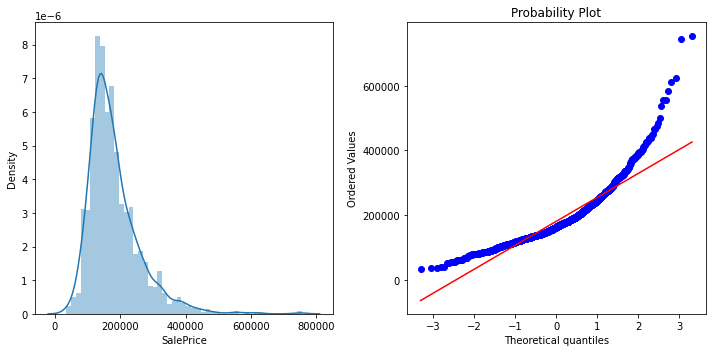

In [23]:
from scipy import stats
y= train['SalePrice']
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
plt.subplot(1, 2, 1)
sns.distplot(y)
plt.subplot(1, 2, 2)
stats.probplot(y,plot=plt)
plt.tight_layout()

<strong> The normal Plot of SalePrice depending on other values</strong>

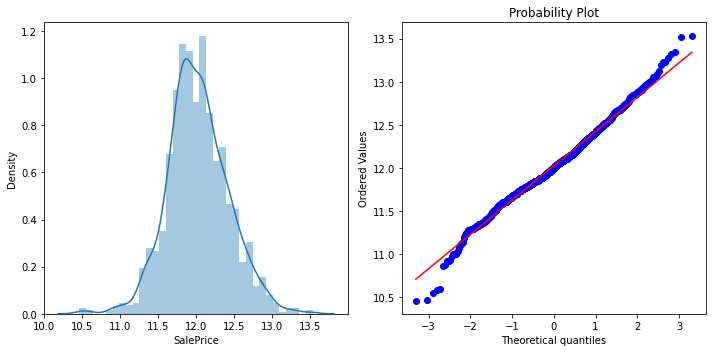

In [24]:
y= np.log1p(train['SalePrice'])
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
plt.subplot(1, 2, 1)
sns.distplot(y)
plt.subplot(1, 2, 2)
stats.probplot(y,plot=plt)
plt.tight_layout()


<strong> as we can se the probability and the density become more stable when we put the logarithm of the SalePrice</strong>

In [25]:
categorical_columns = list(train.select_dtypes(include = ['object']).columns)
categorical_columns = categorical_columns + ['MSSubClass','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','IsRemod']
Categorical_ordinal_columns = ['LotShape','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish']
Categorical_nominal_columns = [i for i in categorical_columns if i not in Categorical_ordinal_columns]
numerical_cols = [i for i in train.columns if i not in categorical_columns]


<strong> we find the numerical columns in the DataFrame and find their correalation SalePrice</strong>

In [26]:
train[numerical_cols].corr()['SalePrice'].abs().sort_values(ascending = False)

SalePrice         1.000000
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
GarageFinish      0.549247
TotRmsAbvGrd      0.533723
YearsOld          0.523350
YearsRemod        0.509079
MasVnrArea        0.472614
Fireplaces        0.466929
BsmtFinSF1        0.386420
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotShape          0.267759
LotArea           0.263843
YearsOldGarage    0.261441
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
LotFrontage       0.209624
BedroomAbvGr      0.168213
EnclosedPorch     0.128578
ScreenPorch       0.111447
3SsnPorch         0.044584
LowQualFinSF      0.025606
MiscVal           0.021190
BsmtFinSF2        0.011378
Name: SalePrice, dtype: float64

In [27]:
threshold = 0.2
df = train[numerical_cols].corr()['SalePrice'].abs().sort_values(ascending = False).reset_index()
df.columns = ['Features','Correlation'] 
numerical_cols = df[df['Correlation'] >= 0.2]['Features'].to_list()

In [28]:
selected_columns = numerical_cols + categorical_columns

In [29]:
feature_train = train[selected_columns]

<strong> the selected columns are all objects and numerical columns which has more than 0.2 correalation with the Target</strong>

<AxesSubplot:>

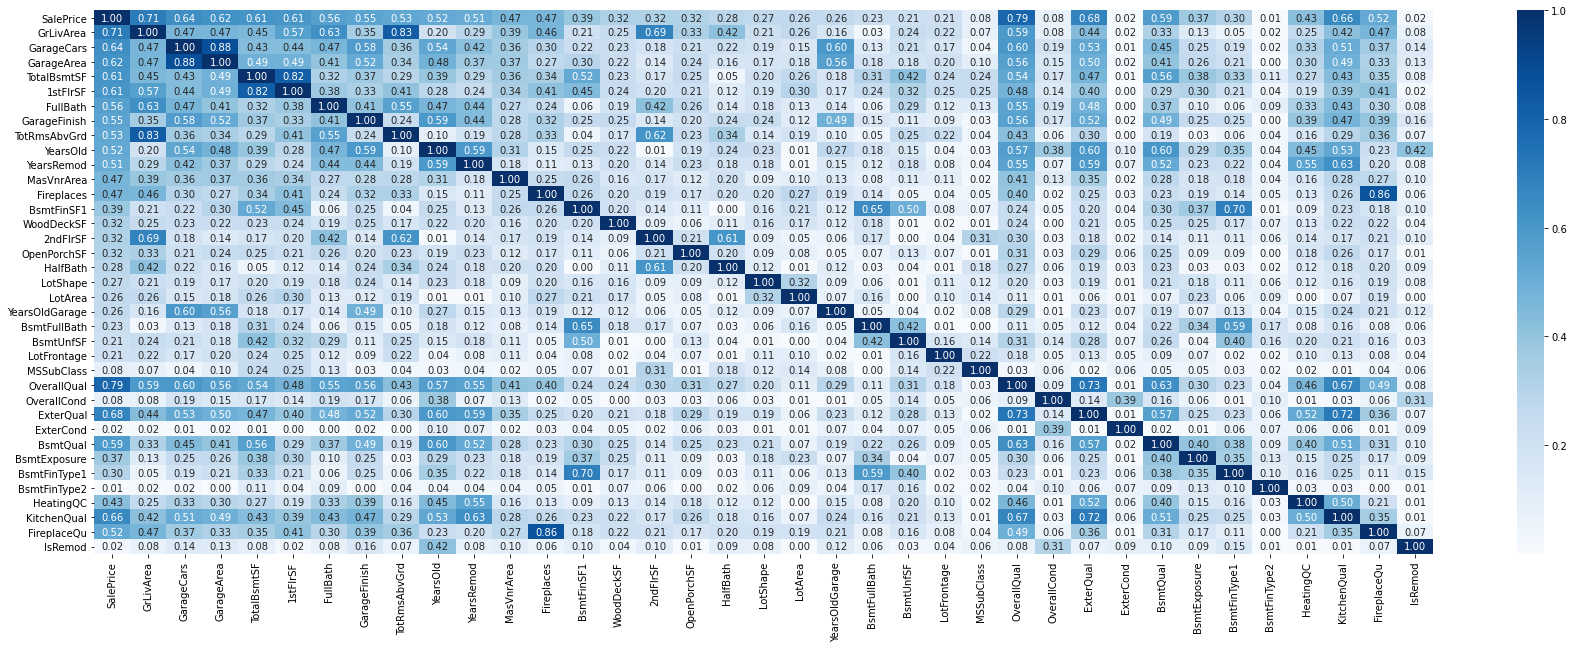

In [30]:
fig, ax = plt.subplots(figsize=(30,10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(feature_train.corr().abs(),annot = True,fmt = '.2f',cmap = 'Blues',ax=ax)

<strong> the heatmap of the correalation of the selected values with the Target</strong>

# 1.3

<strong>Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information</strong>
<strong> no we do not need any normalization here. as we can see the most of the data is categorial or even numerical with a small range of variety except the target which we will drop from this data</strong>

# 1.4 & 1.6

<strong> in phase 3 we will see the difference between encodings and the perfect P to split the data</strong>

# 1.5

<strong> no we do not need all the columns. we can drop the columns with high percentage of missed values. as we just did in the pre processing we deleted some old columns and added newer columns. or we can even delete the columns wich more than 80% of the values belong to just one class.<br>
these kinds of data may not help our predicion but also make it worse</strong>

# Phase2

In [31]:
cols_to_remove = ['SalePrice']
selected_columns = [i for i in selected_columns if i not in cols_to_remove]
y = feature_train['SalePrice']
x = feature_train[selected_columns]

In [32]:
objects = []
for i in x:
    if x[i].dtypes == 'object':
        objects.append(i)


# 1.4

<strong> in this phase we chose a different encoding for each regressor, for knn we used HelmertEncoder, for decision tree we used TargetEncoder and at last for linearRegression we also used Target Encoder, these conclusions are ftom testing each and every one of the Encoders like LeaveOneOut, HashEncoder, BinaryEncoder etc.</strong>

# 1.6

<strong> we also splitted the data fifferently for every regression:<br>
for KNN the 75 percent of the data is train and the other is test<br>
for decision tree is just like KNN<br>
for linear Regression the 15 percent of the data is test and the rest is train Data<br>
these values comes from running different tests with different parameters and choosing the best one</strong>

# KNN Regression

In [33]:
P = 0.75
idx = int(P * len(x))
x_train = x.iloc[:idx, :]
x_test = x.iloc[idx:, :]
y_train = y.iloc[:idx]
y_test = y.iloc[idx:]
enc = HelmertEncoder(cols=objects)
x_train = enc.fit_transform(x_train, y_train)
x_test = enc.transform(x_test)

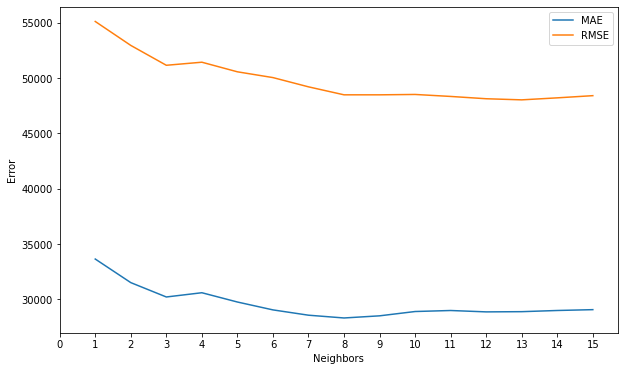

In [34]:
plt.figure(figsize=(10,6))
xl = [i for i in range(1, 16)]
y_mae = []
y_rmse = []
for n in xl:
    KNN = knr(n_neighbors=n)
    KNN.fit(x_train, y_train)
    MAE = metrics.mean_absolute_error(y_test, KNN.predict(x_test))
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, KNN.predict(x_test)))
    y_mae.append(MAE)
    y_rmse.append(RMSE)

plt.plot(xl,y_mae, label='MAE')
plt.plot(xl,y_rmse, label='RMSE')
plt.xticks([i for i in range(16)])
plt.xlabel('Neighbors')
plt.ylabel('Error')
plt.legend()



<strong> as shown above when n = 8 the MAE value is at its least value<br>
we loop through 16 different n_neighbors to see which value gives the result</strong>

In [35]:
neigh = knr(n_neighbors=8)
neigh.fit(x_train, y_train)
answer = neigh.predict(x_test)
prediction = y_test.to_numpy()
MAE = metrics.mean_absolute_error(answer, prediction)
RMSE = np.sqrt(metrics.mean_squared_error(answer, prediction))
print("MAE : ", MAE, "\nRMSE : ",RMSE)

MAE :  28316.67020547945 
RMSE :  48481.824428329404


# Decision Tree Regression

In [36]:
P = 0.75
idx = int(P * len(x))
x_train = x.iloc[:idx, :]
x_test = x.iloc[idx:, :]
y_train = y.iloc[:idx]
y_test = y.iloc[idx:]
enc = TargetEncoder(cols=objects)
x_train = enc.fit_transform(x_train, y_train)
x_test = enc.transform(x_test)

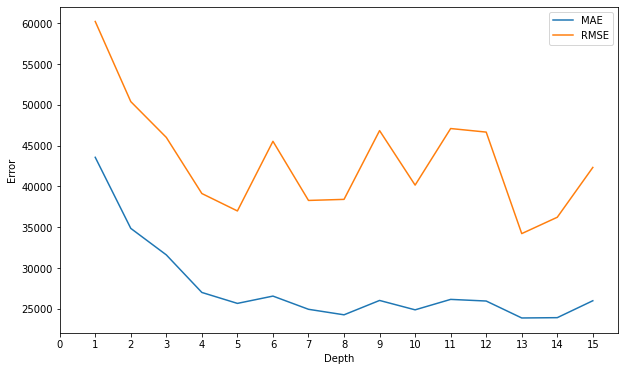

In [37]:
plt.figure(figsize=(10,6))
xl = [i for i in range(1, 16)]
y_mae = []
y_rmse = []
for n in xl:
    dt = dtr(max_depth=n)
    dt.fit(x_train, y_train)
    MAE = metrics.mean_absolute_error(y_test, dt.predict(x_test))
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, dt.predict(x_test)))
    y_mae.append(MAE)
    y_rmse.append(RMSE)
plt.plot(xl,y_mae, label='MAE')
plt.plot(xl,y_rmse, label='RMSE')
plt.xticks([i for i in range(16)])
plt.xlabel('Depth')
plt.ylabel('Error')
plt.legend()

<strong> just like before,we loop through 6 different depths, when depth = 8 MAE is at its least value</strong>

In [38]:
Dtree = dtr(max_depth=8)
Dtree.fit(x_train, y_train)
answer = Dtree.predict(x_test)
prediction = y_test.to_numpy()
MAE = metrics.mean_absolute_error(answer, prediction)
RMSE = np.sqrt(metrics.mean_squared_error(answer, prediction))
print("MAE : ", MAE, "\nRMSE : ",RMSE)

MAE :  23864.829918497493 
RMSE :  34238.12975553699


# Linear Regression

In [39]:
P = 0.15
idx = int(P * len(x))
x_test = x.iloc[:idx, :]
x_train = x.iloc[idx:, :]
y_test = y.iloc[:idx]
y_train = y.iloc[idx:]
enc = TargetEncoder(cols=objects)
x_train = enc.fit_transform(x_train, y_train)
x_test = enc.transform(x_test)
linear = lr()
linear.fit(x_train, y_train)
answer = linear.predict(x_test)
prediction = y_test.to_numpy()

In [40]:

MAE = metrics.mean_absolute_error(answer, prediction)
RMSE = np.sqrt(metrics.mean_squared_error(answer, prediction))
print("MAE : ", MAE, "\nRMSE : ",RMSE)

MAE :  18750.27155669991 
RMSE :  26822.462129867992


# 2.3

<strong>variance-bias tradeoff: If the model has high variance, overfitting happens. It means the model is trained too much on the training data and it can predict well on the training dat but it won't do well on the test data as it was unseen.
On the other hand, if the model has high bias, underfitting happens. In this scenario, the model is too simple or hasn't been trained enough. This model usually performs poorly on both train and test data.
we can check if any of these has occured in our modelings</strong>

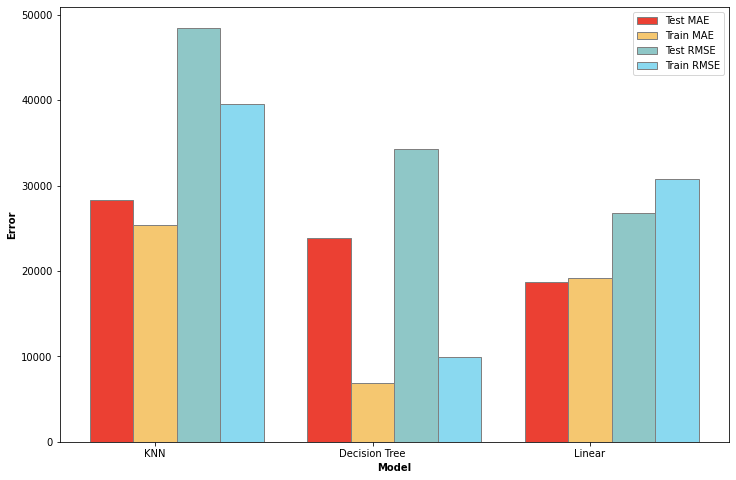

In [41]:
barWidth = 0.2
P = 0.75
idx = int(P * len(x))
x_train = x.iloc[:idx, :]
x_test = x.iloc[idx:, :]
y_train = y.iloc[:idx]
y_test = y.iloc[idx:]
enc = HelmertEncoder(cols=objects)
x_train = enc.fit_transform(x_train, y_train)
x_test = enc.transform(x_test)
fig = plt.subplots(figsize =(12, 8))
test_mae_err = []
train_mae_err = []
test_rmse_err = []
train_rmse_err = []
MAE = metrics.mean_absolute_error(y_train, neigh.predict(x_train))
RMSE = np.sqrt(metrics.mean_squared_error(y_train, neigh.predict(x_train)))
train_mae_err.append(MAE)
train_rmse_err.append(RMSE)
MAE = metrics.mean_absolute_error(y_test, neigh.predict(x_test))
RMSE = np.sqrt(metrics.mean_squared_error(y_test, neigh.predict(x_test)))
test_mae_err.append(MAE)
test_rmse_err.append(RMSE)
x_train = x.iloc[:idx, :]
x_test = x.iloc[idx:, :]
y_train = y.iloc[:idx]
y_test = y.iloc[idx:]
enc = TargetEncoder(cols=objects)
x_train = enc.fit_transform(x_train, y_train)
x_test = enc.transform(x_test)
MAE = metrics.mean_absolute_error(y_train, Dtree.predict(x_train))
RMSE = np.sqrt(metrics.mean_squared_error(y_train, Dtree.predict(x_train)))
train_mae_err.append(MAE)
train_rmse_err.append(RMSE)
MAE = metrics.mean_absolute_error(y_test, Dtree.predict(x_test))
RMSE = np.sqrt(metrics.mean_squared_error(y_test, Dtree.predict(x_test)))
test_mae_err.append(MAE)
test_rmse_err.append(RMSE)
P = 0.15
idx = int(P * len(x))
x_test = x.iloc[:idx, :]
x_train = x.iloc[idx:, :]
y_test = y.iloc[:idx]
y_train = y.iloc[idx:]
enc = TargetEncoder(cols=objects)
x_train = enc.fit_transform(x_train, y_train)
x_test = enc.transform(x_test)
MAE = metrics.mean_absolute_error(y_train, linear.predict(x_train))
RMSE = np.sqrt(metrics.mean_squared_error(y_train, linear.predict(x_train)))
train_mae_err.append(MAE)
train_rmse_err.append(RMSE)
MAE = metrics.mean_absolute_error(y_test, linear.predict(x_test))
RMSE = np.sqrt(metrics.mean_squared_error(y_test, linear.predict(x_test)))
test_mae_err.append(MAE)
test_rmse_err.append(RMSE)
br1 = np.arange(len(test_mae_err))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
plt.bar(br1, test_mae_err, color =(0.92, 0.25, 0.2), width = barWidth, 
        edgecolor ='grey', label ='Test MAE') 
plt.bar(br2, train_mae_err, color =(0.96, 0.78, 0.44), width = barWidth, 
        edgecolor ='grey', label ='Train MAE')
plt.bar(br3, test_rmse_err, color =(0.56, 0.78, 0.78), width = barWidth, 
        edgecolor ='grey', label ='Test RMSE') 
plt.bar(br4, train_rmse_err, color =(0.54, 0.85, 0.94), width = barWidth, 
        edgecolor ='grey', label ='Train RMSE')
plt.xlabel('Model', fontweight ='bold') 
plt.ylabel('Error', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(train_rmse_err))], 
           ['KNN','Decision Tree', 'Linear']) 
plt.legend()
plt.show() 


<strong> as we see above the KNN is overfitted as it performs better for the test data but the other two are slightly underfitted</strong>

# Phase 3

# Random Forest

In [42]:
P = 0.65
idx = int(P * len(x))
x_train = x.iloc[:idx, :]
x_test = x.iloc[idx:, :]
y_train = y.iloc[:idx]
y_test = y.iloc[idx:]
enc = TargetEncoder(cols=objects)
x_train = enc.fit_transform(x_train, y_train)
x_test = enc.transform(x_test)

In [43]:
param_grid = {'max_depth': [6, 30],'n_estimators': [5, 300]}
random_forest = rfr()
forest_grid_search = GridSearchCV(random_forest, param_grid, cv=5,return_train_score=True, verbose=True,n_jobs=-1)
random_forest.fit(x_train, y_train)
answer = random_forest.predict(x_test)
prediction = y_test.to_numpy()
MAE = metrics.mean_absolute_error(answer, prediction)
RMSE = np.sqrt(metrics.mean_squared_error(answer, prediction))
print("MAE : ", MAE, "\nRMSE : ",RMSE)


MAE :  17636.188454011743 
RMSE :  29400.223503934252


<strong> we use grid search to find the best hyper parametesrs for our random forest for depth between 6 and 30 <br> and number of estimators up to 300</strong>

# Voting Regression

In [46]:
P = 0.1
idx = int(P * len(x))
x_test = x.iloc[:idx, :]
x_train = x.iloc[idx:, :]
y_test = y.iloc[:idx]
y_train = y.iloc[idx:]
enc = TargetEncoder(cols=objects)
x_train = enc.fit_transform(x_train, y_train)
x_test = enc.transform(x_test)

In [47]:
voting = vr([('linear',linear), ('knn',neigh), ('dtree',Dtree)])
voting.fit(x_train, y_train)
answer = voting.predict(x_test)
prediction = y_test.to_numpy()
MAE = metrics.mean_absolute_error(answer, prediction)
RMSE = np.sqrt(metrics.mean_squared_error(answer, prediction))
print("MAE : ", MAE, "\nRMSE : ",RMSE)


MAE :  16886.57938119035 
RMSE :  23882.04569144333


<strong> in the voting regression we choose the best output between all of our models and therefore we will have the best modeling that we could have in our models</strong>

<strong>Random Forest model creates some decision tree models with a max depth from random records and predicts the value, then chooses the average of these values as the answer. This model results in less bias because it uses multiple trees trained on different parts of data.</strong>
<strong>in Voting in some cases one model may have a weak performance datas but the other models had a better result. With voting regression, that bad result will be covered with the result of other models. So overall we will have better results.</strong>